In [868]:
import pandas as pd
import numpy as np

In [869]:
consumer_all_convinces_path = r'C:\Users\chaiyapat metha\Desktop\AI Project\Thailand comsumption\Prep-ed\Electrical consumer all convince preprocessed.csv'
consumer_BKK_path = r'C:\Users\chaiyapat metha\Desktop\AI Project\Thailand comsumption\Prep-ed\Power consumption in BKK.csv'
consumer_all_Thailand_path = r'C:\Users\chaiyapat metha\Desktop\AI Project\Thailand comsumption\Prep-ed\Electricity consumtion.csv'
Load_peak_path = r'C:\Users\chaiyapat metha\Desktop\AI Project\Thailand comsumption\Prep-ed\Load peak demand and generate.csv'
generator_all_Thailand_path = r'C:\Users\chaiyapat metha\Desktop\AI Project\Thailand comsumption\Prep-ed\Power Generator in Thailand.csv'
import_all_Thailand_path = r'C:\Users\chaiyapat metha\Desktop\AI Project\Thailand comsumption\Prep-ed\Import.csv'
export_all_Thailand_path = r'C:\Users\chaiyapat metha\Desktop\AI Project\Thailand comsumption\Prep-ed\Export.csv'

In [870]:
# Load the datasets
def load_data(df_path):
    df_path = df_path.replace('\\', '/')
    df = pd.read_csv(df_path)
    return df

# consumer_all_convinces

In [871]:
consumer_all_convinces = load_data(consumer_all_convinces_path)
consumer_all_convinces = consumer_all_convinces.replace('-', 0).fillna(0)
consumer_all_convinces = consumer_all_convinces[consumer_all_convinces['ประเภทผู้ใช้ไฟฟ้า'] != 'สถานีอัดประจุไฟฟ้า'] # Remove row with 'สถานีอัดประจุไฟฟ้า'

In [872]:
consumer_all_convinces = consumer_all_convinces.melt(id_vars=['จังหวัด', 'ประเภทผู้ใช้ไฟฟ้า'],
                                                      var_name='เดือน',
                                                        value_name='หน่วยไฟฟ้า'
                                                    )
consumer_all_convinces['เดือน'] = pd.to_datetime(consumer_all_convinces['เดือน'], format='%m%Y')
consumer_all_convinces['หน่วยไฟฟ้า'] = consumer_all_convinces['หน่วยไฟฟ้า'].replace(',', '', regex=True).astype(float)
consumer_all_convinces = consumer_all_convinces.pivot(index='เดือน', columns=['จังหวัด', 'ประเภทผู้ใช้ไฟฟ้า'], values='หน่วยไฟฟ้า')             

# Convert the units from kWh to GWh for better readability
consumer_all_convinces = consumer_all_convinces / 1_000_000

In [873]:
# find unqiue ประเภทผู้ใช้ไฟฟ้า
consumer_all_convinces.columns.get_level_values(1).unique()

Index(['บ้านอยู่อาศัย (น้อยกว่า 150 กิโลวัตต์-ชั่วโมงต่อเดือน)',
       'บ้านอยู่อาศัย (150 และมากกว่า กิโลวัตต์-ชั่วโมงต่อเดือน)',
       'กิจการขนาดเล็ก', 'กิจการขนาดกลาง', 'กิจการขนาดใหญ่',
       'กิจการเฉพาะอย่าง', 'องค์กรที่ไม่แสวงหากำไร', 'สูบน้ำเพื่อการเกษตร',
       'ไฟชั่วคราว', 'ไฟสำรอง', 'ไฟที่สามารถงดจ่ายไฟฟ้าได้'],
      dtype='object', name='ประเภทผู้ใช้ไฟฟ้า')

In [874]:
rename_column = ['Residential_LT_150', 'Residential_GT_150', 'Small General',
       'Medium General', 'Large  General', 'Specific  Business',
       'Gov. & Nonprofit', 'Agriculture Pumping', 'Temporary', 'Stand By ',
       'Interruptible ']

In [875]:
# Rename columns to match the desired names
new_columns = [
    f"{rename_column[i % len(rename_column)]}_{province}"
    for province, i in zip(consumer_all_convinces.columns.get_level_values(0), range(len(consumer_all_convinces.columns)))
]
consumer_all_convinces.columns = new_columns
consumer_all_convinces = consumer_all_convinces.reset_index()
consumer_all_convinces = consumer_all_convinces.rename(columns={'เดือน': 'Date'})

In [876]:
consumer_all_convinces

,Date,Residential_LT_150_ปทุมธานี,Residential_GT_150_ปทุมธานี,Small General_ปทุมธานี,Medium General_ปทุมธานี,Large General_ปทุมธานี,Specific Business_ปทุมธานี,Gov. & Nonprofit_ปทุมธานี,Agriculture Pumping_ปทุมธานี,Temporary_ปทุมธานี,...,Residential_GT_150_นราธิวาส,Small General_นราธิวาส,Medium General_นราธิวาส,Large General_นราธิวาส,Specific Business_นราธิวาส,Gov. & Nonprofit_นราธิวาส,Agriculture Pumping_นราธิวาส,Temporary_นราธิวาส,Stand By _นราธิวาส,Interruptible _นราธิวาส
0,2013-01-01,6.41,81.9,32.5,75.4,285.0,10.5,1.63,0.0189,4.24,...,6.59,4.51,4.10,1.69,0.832,0.00263,0.00526,0.221,0.0,0.0
1,2013-02-01,6.93,88.6,35.1,81.5,308.0,11.4,1.77,0.0204,4.58,...,7.13,4.88,4.43,1.83,0.900,0.00284,0.00569,0.239,0.0,0.0
2,2013-03-01,7.51,96.0,38.1,88.4,334.0,12.3,1.92,0.0221,4.97,...,7.73,5.29,4.80,1.98,0.975,0.00308,0.00617,0.260,0.0,0.0
3,2013-04-01,8.99,115.0,45.6,106.0,399.0,14.7,2.29,0.0265,5.95,...,9.26,6.34,5.75,2.37,1.170,0.00369,0.00738,0.311,0.0,0.0
4,2013-05-01,8.66,111.0,44.0,102.0,385.0,14.2,2.21,0.0255,5.73,...,8.92,6.10,5.54,2.29,1.130,0.00355,0.00711,0.299,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-08-01,6.18,160.0,54.5,115.0,309.0,14.4,2.87,0.0152,5.48,...,13.10,7.38,6.08,3.25,0.383,0.00000,0.00585,0.332,0.0,0.0
116,2022-09-01,5.91,153.0,52.1,110.0,295.0,13.8,2.74,0.0146,5.24,...,12.50,7.06,5.82,3.10,0.366,0.00000,0.00559,0.317,0.0,0.0
117,2022-10-01,5.74,148.0,50.6,107.0,287.0,13.4,2.67,0.0142,5.09,...,12.20,6.86,5.65,3.02,0.356,0.00000,0.00543,0.308,0.0,0.0
118,2022-11-01,5.70,147.0,50.3,106.0,285.0,13.3,2.65,0.0141,5.06,...,12.10,6.81,5.61,2.99,0.353,0.00000,0.00539,0.306,0.0,0.0


# consumer_all_Thailand

In [877]:
consumer_all_Thailand = load_data(consumer_all_Thailand_path)
consumer_all_Thailand = consumer_all_Thailand.fillna(0)
consumer_all_Thailand['Date'] = pd.to_datetime(consumer_all_Thailand['Date'], format='%m%Y')
consumer_all_Thailand.loc[:, consumer_all_Thailand.columns != 'Date'] = \
    consumer_all_Thailand.loc[:, consumer_all_Thailand.columns != 'Date'].replace(',', '', regex=True).astype(float)

In [878]:
consumer_all_Thailand

,Date,Residential_LT_150,Residential_GT_150,Small General,Medium General,Large General,Specific Business,Gov. & Nonprofit,Agriculture Pumping,Temporary,Stand By,Interruptible,Free of,Direct Customer,Grand Total
0,2002-01-01,488.0,1036.0,693.0,1415.0,2958.0,236,246,19,29,1,0,78,128,7327.0
1,2002-02-01,510.0,1088.0,719.0,1406.0,2797.0,238,260,26,31,1,76,74,135,7359.0
2,2002-03-01,597.0,1246.0,816.0,1664.0,3199.0,277,301,24,31,0,85,76,155,8471.0
3,2002-04-01,662.0,1387.0,863.0,1574.0,3014.0,290,287,23,34,0,86,86,154,8461.0
4,2002-05-01,652.0,1338.0,884.0,1670.0,3230.0,278,306,15,34,1,98,77,149,8730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2024-08-01,584.0,4670.0,2034.0,2978.0,6647.0,623,22,25,129,5,99,395,109,18318.0
272,2024-09-01,569.0,4455.0,1971.0,2846.0,6438.0,560,21,20,125,4,107,386,106,17608.0
273,2024-10-01,596.0,4444.0,1968.0,2861.0,6650.0,587,21,19,126,7,114,400,107,17900.0
274,2024-11-01,559.0,4230.0,1906.0,2825.0,6379.0,577,20,18,122,8,90,397,101,17232.0


# consumer_BKK

In [879]:
consumer_BKK = load_data(consumer_BKK_path)
consumer_BKK = consumer_BKK.fillna(0)
consumer_BKK['Date'] = pd.to_datetime(consumer_BKK['Date'], format='%m%Y')
consumer_BKK.loc[:, consumer_BKK.columns != 'Date'] = \
    consumer_BKK.loc[:, consumer_BKK.columns != 'Date'].replace(',', '', regex=True).astype(float)

In [880]:
rename_column = ['Residential_LT_150', 'Residential_GT_150', 'Small General',
       'Medium General', 'Large  General', 'Specific  Business',
       'Gov. & Nonprofit', 'Agriculture Pumping', 'Temporary', 'Stand By ',
       'Interruptible ']

In [881]:
# Rename columns to match the desired names
consumer_BKK.columns = ['Date'] + [col + '_BKK' for col in rename_column]
consumer_BKK

,Date,Residential_LT_150_BKK,Residential_GT_150_BKK,Small General_BKK,Medium General_BKK,Large General_BKK,Specific Business_BKK,Gov. & Nonprofit_BKK,Agriculture Pumping_BKK,Temporary_BKK,Stand By _BKK,Interruptible _BKK
0,2016-01-01,193.0,751.0,582.0,635.0,1340.0,157.0,9.06,0.0,30.4,0.0,34.4
1,2016-02-01,207.0,814.0,629.0,687.0,1450.0,169.0,9.80,0.0,32.9,0.0,37.2
2,2016-03-01,226.0,881.0,682.0,744.0,1570.0,183.0,10.60,0.0,35.7,0.0,40.3
3,2016-04-01,272.0,1050.0,817.0,891.0,1880.0,220.0,12.70,0.0,42.7,0.0,48.3
4,2016-05-01,259.0,1020.0,787.0,859.0,1810.0,212.0,12.30,0.0,41.1,0.0,46.5
...,...,...,...,...,...,...,...,...,...,...,...,...
108,2025-01-01,130.0,907.0,531.0,643.0,1360.0,154.0,11.50,0.0,26.1,15.3,43.8
109,2025-02-01,156.0,1090.0,586.0,680.0,1360.0,163.0,11.90,0.0,29.1,15.6,39.6
110,2025-03-01,184.0,1290.0,653.0,776.0,1540.0,192.0,14.20,0.0,32.6,18.2,43.9
111,2025-04-01,203.0,1420.0,675.0,722.0,1440.0,192.0,13.70,0.0,31.8,20.2,42.4


# Load_peak

In [882]:
Load_peak = load_data(Load_peak_path)
Load_peak = Load_peak.fillna(0)
Load_peak['Date'] = pd.to_datetime(Load_peak['Date'], format='%m%Y')
Load_peak.loc[:, Load_peak.columns != 'Date'] = \
    Load_peak.loc[:, Load_peak.columns != 'Date'].replace(',', '', regex=True).astype(float) 

# Convert from MW to GW
Load_peak[Load_peak.columns.difference(['Date'])] = Load_peak[Load_peak.columns.difference(['Date'])] / 1000 
Load_peak = Load_peak.rename(columns={'PEAK (MW)': 'PEAK (GW)'})

In [883]:
Load_peak

,Date,PEAK (GW),GENERATION,LOAD FACTOR
0,2002-01-01,14.553,8.262,0.07630
1,2002-02-01,15.261,8.188,0.07980
2,2002-03-01,16.485,9.687,0.07900
3,2002-04-01,16.681,9.378,0.07810
4,2002-05-01,16.293,9.655,0.07960
...,...,...,...,...
271,2024-08-01,31.201,18.714,0.08061
272,2024-09-01,29.953,17.829,0.08267
273,2024-10-01,30.028,18.378,0.08226
274,2024-11-01,30.694,17.322,0.07838


# import_all_Thailand

In [884]:
import_all_Thailand = load_data(import_all_Thailand_path)
import_all_Thailand = import_all_Thailand.fillna(0)
import_all_Thailand['YEAR'] = pd.to_datetime(import_all_Thailand['YEAR'], format='%Y')

In [885]:
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

In [886]:
import_all_Thailand = import_all_Thailand.melt(id_vars='YEAR', var_name='Month', value_name='imported_power (GWh)')

import_all_Thailand['Month'] = import_all_Thailand['Month'].str.strip()  # Remove any leading/trailing whitespace
import_all_Thailand['Month'] = import_all_Thailand['Month'].map(month_map)
import_all_Thailand['YEAR'] = pd.to_datetime(import_all_Thailand['YEAR']).dt.year
import_all_Thailand['Date'] = pd.to_datetime(dict(year=import_all_Thailand['YEAR'], month=import_all_Thailand['Month'], day=1))

import_all_Thailand = import_all_Thailand[['Date', 'imported_power (GWh)']].sort_values('Date').reset_index(drop=True)

In [887]:
import_all_Thailand

,Date,imported_power (GWh)
0,1986-01-01,56.2
1,1986-02-01,48.3
2,1986-03-01,37.1
3,1986-04-01,32.0
4,1986-05-01,43.4
...,...,...
463,2024-08-01,3520.0
464,2024-09-01,3960.0
465,2024-10-01,4030.0
466,2024-11-01,2820.0


# export_all_Thailand

In [888]:
export_all_Thailand = load_data(export_all_Thailand_path)
export_all_Thailand = export_all_Thailand.fillna(0)
export_all_Thailand['YEAR'] = pd.to_datetime(export_all_Thailand['YEAR'], format='%Y')

In [889]:
export_all_Thailand = export_all_Thailand.melt(id_vars='YEAR', var_name='Month', value_name='exported_power (GWh)')

export_all_Thailand['Month'] = export_all_Thailand['Month'].str.strip()  # Remove any leading/trailing whitespace
export_all_Thailand['Month'] = export_all_Thailand['Month'].map(month_map)
export_all_Thailand['YEAR'] = pd.to_datetime(export_all_Thailand['YEAR']).dt.year
export_all_Thailand['Date'] = pd.to_datetime(dict(year=export_all_Thailand['YEAR'], month=export_all_Thailand['Month'], day=1))

export_all_Thailand = export_all_Thailand[['Date', 'exported_power (GWh)']].sort_values('Date').reset_index(drop=True)

In [890]:
export_all_Thailand

,Date,exported_power (GWh)
0,1986-01-01,1.44
1,1986-02-01,1.37
2,1986-03-01,1.57
3,1986-04-01,1.46
4,1986-05-01,1.47
...,...,...
463,2024-08-01,56.20
464,2024-09-01,53.20
465,2024-10-01,66.30
466,2024-11-01,77.80


In [891]:
generator_all_Thailand = load_data(generator_all_Thailand_path)

# Drop rows that contain NaN in column 'Output'
generator_all_Thailand = generator_all_Thailand.dropna(subset=['Output'])
generator_all_Thailand = generator_all_Thailand.drop(columns=['Name_link','English Name','Operator','Method','Wikidata'])

In [892]:
output_str = generator_all_Thailand['Output']

# delete commas and 'MW', then convert to float
output_clean = output_str.str.replace(',', '', regex=False) \
                         .str.replace('MW', '', regex=False) \
                         .str.strip() \
                         .astype(float)

# change the unit from MW to GW
generator_all_Thailand['Output (GWh)'] = output_clean / 1000
generator_all_Thailand = generator_all_Thailand.drop('Output', axis=1)


In [893]:
generator_all_Thailand

,Name,Source,lat,lon,Output (GWh)
0,โรงไฟฟ้าราชบุรี,gas,13.593056,99.886512,5.04500
1,โรงไฟฟ้าพระนครใต้,gas,13.614186,100.563494,2.49200
2,โรงไฟฟ้าแม่เมาะ,coal,18.292390,99.741714,2.22000
3,โรงไฟฟ้าบางปะกง,gas,13.505926,101.021639,1.86200
4,โรงไฟฟ้าหนองแซง(Gulf JP NS),gas,14.439004,100.778059,1.60000
...,...,...,...,...,...
94,โครงการผลิตไฟฟ้าพลังงานแสงอาทิตย์ บางหลวง,solar,14.010203,100.475292,0.00500
95,[unnamed],solar,11.426372,99.556603,0.00500
96,[unnamed],solar,13.899776,100.906329,0.00500
97,โรงไฟฟ้าพลังงานแสงอาทิตย์หนองเพรางาย,solar,13.905844,100.303842,0.00435


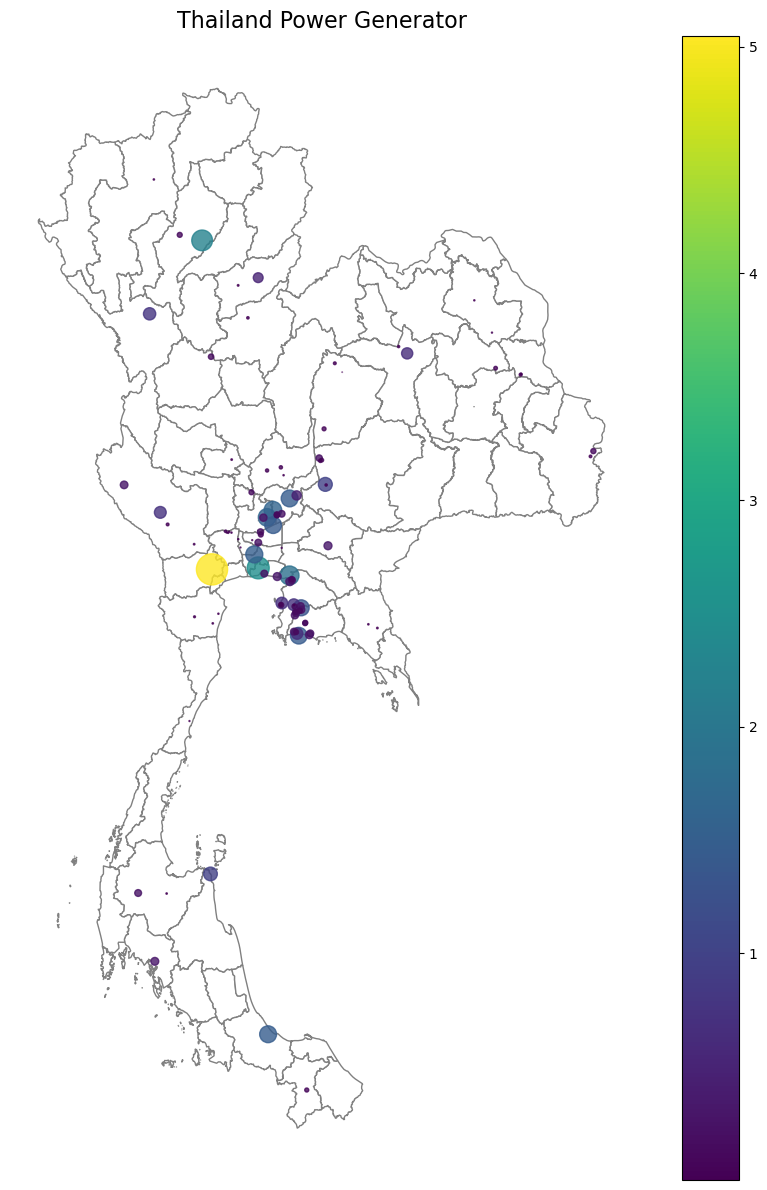

In [894]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON convince boundary
gdf_province = gpd.read_file("C:/Users/chaiyapat metha/Desktop/AI Project/Thailand comsumption/provinces.geojson")

# 3. แปลง DataFrame เป็น GeoDataFrame
gdf_power = gpd.GeoDataFrame(
    generator_all_Thailand,
    geometry=gpd.points_from_xy(generator_all_Thailand['lon'], generator_all_Thailand['lat']),
    crs="EPSG:4326"
)

# 4. plot
fig, ax = plt.subplots(figsize=(10, 12))
gdf_province.plot(ax=ax, edgecolor='gray', facecolor='white')

# Plot points of power generators
gdf_power.plot(
    ax=ax,
    column='Output (GWh)',
    cmap='viridis',
    markersize=gdf_power['Output (GWh)']*100,
    legend=True,
    alpha=0.8
)

plt.title("Thailand Power Generator", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [895]:
# Get date intersection
date_sets = [
    set(consumer_all_convinces['Date']),
    set(consumer_BKK['Date']),
    set(import_all_Thailand['Date']),
    set(export_all_Thailand['Date'])
]
common_dates = sorted(set.intersection(*date_sets))

In [896]:
# Repeat output for each common date
generator_outputs = generator_all_Thailand[['Name', 'Output (GWh)']].copy()
generator_all_Thailand_Date = pd.DataFrame({'Date': common_dates})

In [897]:
# Add generator columns
for _, row in generator_outputs.iterrows():
    generator_all_Thailand_Date[row['Name']] = row['Output (GWh)']

In [898]:
def filter_by_dates(df):
    df = df[df['Date'].isin(common_dates)].copy()
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [899]:
consumer_all_convinces = filter_by_dates(consumer_all_convinces)
consumer_BKK = filter_by_dates(consumer_BKK)
import_all_Thailand = filter_by_dates(import_all_Thailand)
export_all_Thailand = filter_by_dates(export_all_Thailand)
generator_all_Thailand_Date = filter_by_dates(generator_all_Thailand_Date)

In [901]:
# Merge all dataframes to create a balanced power flow dataframe
"""
[generator_all_Thailand_Date + consumer_all_convinces + consumer_BKK + import_all_Thailand + export_all_Thailand]

"""
Power_flow_balanced = generator_all_Thailand_Date.copy()
Power_flow_balanced = Power_flow_balanced.merge(consumer_all_convinces, on='Date', how='left')
Power_flow_balanced = Power_flow_balanced.merge(consumer_BKK, on='Date', how='left')
Power_flow_balanced = Power_flow_balanced.merge(import_all_Thailand, on='Date', how='left', suffixes=('', '_import'))
Power_flow_balanced = Power_flow_balanced.merge(export_all_Thailand, on='Date', how='left', suffixes=('', '_export'))

In [902]:
consumer_cols = list(consumer_all_convinces.columns.difference(['Date'])) + \
                list(consumer_BKK.columns.difference(['Date']))

# Calculate Total_comsumer using only consumer-related columns
Power_flow_balanced['Total_comsumer'] = Power_flow_balanced[consumer_cols].sum(axis=1)

In [909]:
generator_cols = list(generator_all_Thailand_Date.columns.difference(['Date']))
convert_factor = 720 # convert Wh to GWh in month

# Calculate Total_gerator 
Power_flow_balanced['Total_gerator'] = Power_flow_balanced[generator_cols].sum(axis=1)*convert_factor 

In [910]:
# Loss = (Import + Generator) - (Total_consumer + Export)
import_val = import_all_Thailand.set_index('Date').reindex(Power_flow_balanced['Date']).iloc[:, 0].values
export_val = export_all_Thailand.set_index('Date').reindex(Power_flow_balanced['Date']).iloc[:, 0].values

In [911]:
Power_flow_balanced['Loss'] = (import_val + Power_flow_balanced['Total_gerator']) - (Power_flow_balanced['Total_comsumer'] + export_val)

In [912]:
Power_flow_balanced

,Date,โรงไฟฟ้าราชบุรี,โรงไฟฟ้าพระนครใต้,โรงไฟฟ้าแม่เมาะ,โรงไฟฟ้าบางปะกง,โรงไฟฟ้าหนองแซง(Gulf JP NS),โรงไฟฟ้าอุทัย,การไฟฟ้าฝ่ายผลิตแห่งประเทศไทย,โรงไฟฟ้าจะนะ,โรงไฟฟ้าแก่งคอย2 Gulf Power,...,Gov. & Nonprofit_BKK,Agriculture Pumping_BKK,Temporary_BKK,Stand By _BKK,Interruptible _BKK,imported_power (GWh),exported_power (GWh),Total_comsumer,Total_gerator,Loss
0,2016-01-01,5.045,2.492,2.22,1.862,1.6,1.6,1.498,1.476,1.468,...,9.06,0.0,30.4,0.000,34.4,1150.0,185.0,12971.290634,27782.5968,15776.306166
1,2016-02-01,5.045,2.492,2.22,1.862,1.6,1.6,1.498,1.476,1.468,...,9.80,0.0,32.9,0.000,37.2,1100.0,99.9,14027.482627,27782.5968,14755.214173
2,2016-03-01,5.045,2.492,2.22,1.862,1.6,1.6,1.498,1.476,1.468,...,10.60,0.0,35.7,0.000,40.3,1340.0,203.0,15204.919101,27782.5968,13714.677699
3,2016-04-01,5.045,2.492,2.22,1.862,1.6,1.6,1.498,1.476,1.468,...,12.70,0.0,42.7,0.000,48.3,1390.0,236.0,18200.774544,27782.5968,10735.822256
4,2016-05-01,5.045,2.492,2.22,1.862,1.6,1.6,1.498,1.476,1.468,...,12.30,0.0,41.1,0.000,46.5,1910.0,197.0,17543.008939,27782.5968,11952.587861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2022-08-01,5.045,2.492,2.22,1.862,1.6,1.6,1.498,1.476,1.468,...,11.80,0.0,31.9,1.230,43.9,3870.0,74.3,16470.047666,27782.5968,15108.249134
80,2022-09-01,5.045,2.492,2.22,1.862,1.6,1.6,1.498,1.476,1.468,...,11.30,0.0,30.5,1.170,41.9,3420.0,59.4,15741.898645,27782.5968,15401.298155
81,2022-10-01,5.045,2.492,2.22,1.862,1.6,1.6,1.498,1.476,1.468,...,11.00,0.0,29.6,1.140,40.7,3140.0,69.0,15290.589507,27782.5968,15563.007293
82,2022-11-01,5.045,2.492,2.22,1.862,1.6,1.6,1.498,1.476,1.468,...,10.90,0.0,29.4,1.130,40.5,2090.0,197.0,15186.912897,27782.5968,14488.683903


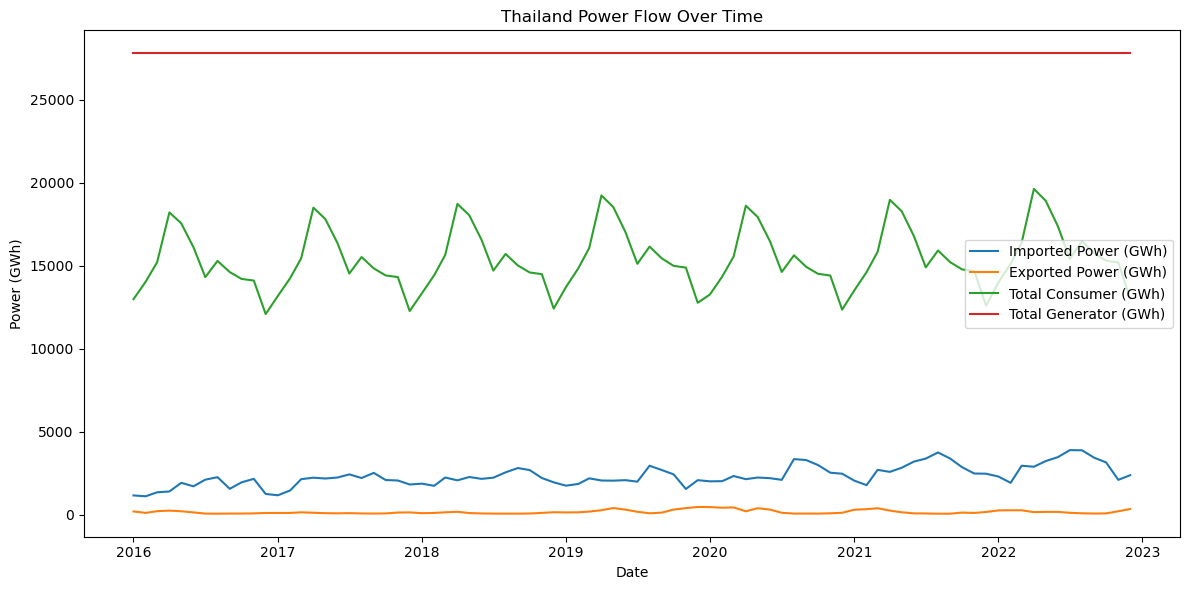

In [913]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(Power_flow_balanced['Date'], Power_flow_balanced['imported_power (GWh)'], label='Imported Power (GWh)')
plt.plot(Power_flow_balanced['Date'], Power_flow_balanced['exported_power (GWh)'], label='Exported Power (GWh)')
plt.plot(Power_flow_balanced['Date'], Power_flow_balanced['Total_comsumer'], label='Total Consumer (GWh)')
plt.plot(Power_flow_balanced['Date'], Power_flow_balanced['Total_gerator'], label='Total Generator (GWh)')

plt.xlabel('Date')
plt.ylabel('Power (GWh)')
plt.title('Thailand Power Flow Over Time')
plt.legend()
plt.tight_layout()
plt.show()